___
# Ciência dos Dados - PROJETO 1

## João Laet de Toledo Cesar

  ## Como escolaridade se relaciona com a cor de pele e classe social

___
## Introdução

O projeto tem como objetivo analisar a escolaridade em diferentes classes sociais no Brasil, tendo como foco a cor de pele. Para isso, será feito um Data Frame com variáveis de escolaridade, raça e classe social. Após, ele será dividido em 5 diferentes bases de dados, um para cada raça, depois, serão subdivididos em 3 classes sociais (até um salário mínimo, entre um e cinco salários mínimos e mais que cinco salários mínimos). Desta maneira, será possível analisar se realmente existe alguma diferença entre a escolaridade nas diferentes raças.

___
## Filtros da base de dados

In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [22]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\João Laet\Documents\3° semestre\Ciencia dos Dados\Projeto 1


In [23]:
#Se usar o arquivo descompactado
dados2015 = pd.read_csv('PES2015.csv',sep=',')
df = pd.DataFrame({"cor_raça":dados2015["V0404"],
                   "Idade":dados2015["V8005"],
                   "Faixa_de_Renda":dados2015["V4743"],
                   "sabe_ler_e_escrever":dados2015["V0601"],
                   "Rede_Ensino":dados2015["V6002"],
                   "Anos_Estudo": dados2015["V4803"],
                   "ultima_serie_concluida": dados2015["V0610"],
                   "Frequenta_escola_ou_creche": dados2015["V0602"]})
df.head()

,Anos_Estudo,Faixa_de_Renda,Frequenta_escola_ou_creche,Idade,Rede_Ensino,cor_raça,sabe_ler_e_escrever,ultima_serie_concluida
0,12,4.0,4,23,NaN,8,1,3.0
1,12,4.0,4,23,NaN,2,1,3.0
2,15,4.0,2,35,4.0,8,1,NaN
3,15,4.0,4,34,NaN,8,1,3.0
4,4,4.0,2,11,4.0,8,1,NaN


In [24]:
sloq9 = df.cor_raça.astype('category')
sloq9.cat.categories = (['Indígena', 'Branca', 'Preta' ,'Amarela', 'Parda', 'Sem declaração'])

slow9 = df.Faixa_de_Renda.astype('category')
slow9.cat.categories = (["Sem renda", "1/4 SM", 'entre 1/4 e 1/2 SM', 'entre 1/2 e 1 SM', 'entre 1 e 2 SM', 'entre 2 e 3 SM',
                         'entre 3 e 5 SM', 'Mais que 5 SM', 'sem declaração'])

sloe9 = df.sabe_ler_e_escrever.astype('category')
sloe9.cat.categories = (["Sim", "Não"])

slor9 = df.Rede_Ensino.astype('category')
slor9.cat.categories = (["Pública", "Privada"])

slot9 = df.ultima_serie_concluida.astype('category')
slot9.cat.categories = (["primeira", 'segunda', 'terceira', 'quarta', 'quinta','sexta','setima','oitava','nona'])

sloy9 = df.Frequenta_escola_ou_creche.astype('category')
sloy9.cat.categories = (["sim", "não"])




dataframe = pd.DataFrame({"Cor_Raça":sloq9,
                          "Idade":dados2015["V8005"],
                          "Faixa_de_Renda":slow9,
                          "Rede_Ensino":slor9,
                          "sabe_ler_e_escrever":sloe9,
                          "ultima_serie_concluida": slot9,
                          "Frequenta_escola_ou_creche":sloy9,
                          "Anos_Estudo": dados2015["V4803"]})


pardos = dataframe[dataframe.Cor_Raça=='Parda']
pretos = dataframe[dataframe.Cor_Raça=='Preta']
brancos = dataframe[dataframe.Cor_Raça=='Branca']
amarelos = dataframe[dataframe.Cor_Raça=='Amarela']
indigenas = dataframe[dataframe.Cor_Raça=='Indígena']

In [25]:
pardosP = pardos[(pardos.Faixa_de_Renda=="Sem Renda")|(pardos.Faixa_de_Renda=="1/4 SM")|(pardos.Faixa_de_Renda=="entre 1/4 e 1/2 de SM")|(pardos.Faixa_de_Renda=='entre 1/2 e 1 SM')]
pretosP = pretos[(pretos.Faixa_de_Renda=="Sem Renda")|(pretos.Faixa_de_Renda=="1/4 SM")|(pretos.Faixa_de_Renda=="entre 1/4 e 1/2 de SM")|(pretos.Faixa_de_Renda=='entre 1/2 e 1 SM')]
brancosP = brancos[(brancos.Faixa_de_Renda=="Sem Renda")|(brancos.Faixa_de_Renda=="1/4 SM")|(brancos.Faixa_de_Renda=="entre 1/4 e 1/2 de SM")|(brancos.Faixa_de_Renda=='entre 1/2 e 1 SM')]
amarelosP = amarelos[(amarelos.Faixa_de_Renda=="Sem Renda")|(amarelos.Faixa_de_Renda=="1/4 SM")|(amarelos.Faixa_de_Renda=="entre 1/4 e 1/2 de SM")|(amarelos.Faixa_de_Renda=='entre 1/2 e 1 SM')]
indigenasP = indigenas[(indigenas.Faixa_de_Renda=="Sem Renda")|(indigenas.Faixa_de_Renda=="1/4 SM")|(indigenas.Faixa_de_Renda=="entre 1/4 e 1/2 de SM")|(indigenas.Faixa_de_Renda=='entre 1/2 e 1 SM')]
pardosPJ = pardosP[pardosP.Idade<18]
pretosPJ = pretosP[pretosP.Idade<18]
brancosPJ = brancosP[brancosP.Idade<18]
amarelosPJ = amarelosP[amarelosP.Idade<18]
indigenasPJ = indigenasP[indigenasP.Idade<18]

pardosM = pardos[(pardos.Faixa_de_Renda=="entre 1 e 2 SM")|(pardos.Faixa_de_Renda=="entre 2 e 3 SM")|(pardos.Faixa_de_Renda=="entre 3 e 5 SM")]
pretosM = pretos[(pretos.Faixa_de_Renda=="entre 1 e 2 SM")|(pretos.Faixa_de_Renda=="entre 2 e 3 SM")|(pretos.Faixa_de_Renda=="entre 3 e 5 SM")]
brancosM = brancos[(brancos.Faixa_de_Renda=="entre 1 e 2 SM")|(brancos.Faixa_de_Renda=="entre 2 e 3 SM")|(brancos.Faixa_de_Renda=="entre 3 e 5 SM")]
amarelosM = amarelos[(amarelos.Faixa_de_Renda=="entre 1 e 2 SM")|(amarelos.Faixa_de_Renda=="entre 2 e 3 SM")|(amarelos.Faixa_de_Renda=="entre 3 e 5 SM")]
indigenasM = indigenas[(indigenas.Faixa_de_Renda=="entre 1 e 2 SM")|(indigenas.Faixa_de_Renda=="entre 2 e 3 SM")|(indigenas.Faixa_de_Renda=="entre 3 e 5 SM")]
pardosMJ = pardosM[pardosM.Idade<18]
pretosMJ = pretosM[pretosM.Idade<18]
brancosMJ = brancosM[brancosM.Idade<18]
amarelosMJ = amarelosM[amarelosM.Idade<18]
indigenasMJ = indigenasM[indigenasM.Idade<18]

pardosR = pardos[pardos.Faixa_de_Renda=="Mais que 5 SM"]
pretosR = pretos[pretos.Faixa_de_Renda=="Mais que 5 SM"]
brancosR = brancos[brancos.Faixa_de_Renda=="Mais que 5 SM"]
amarelosR = amarelos[amarelos.Faixa_de_Renda=="Mais que 5 SM"]
indigenasR = indigenas[indigenas.Faixa_de_Renda=="Mais que 5 SM"]
pardosRJ = pardosR[pardosR.Idade<18]
pretosRJ = pretosR[pretosR.Idade<18]
brancosRJ = brancosR[brancosR.Idade<18]
amarelosRJ = amarelosR[amarelosR.Idade<18]
indigenasRJ = indigenasR[indigenasR.Idade<18]

In [26]:
USC1 = pardosP.ultima_serie_concluida.value_counts(sort=False)
USC2 = pretosP.ultima_serie_concluida.value_counts(sort=False)
USC3 = brancosP.ultima_serie_concluida.value_counts(sort=False)
USC4 = amarelosP.ultima_serie_concluida.value_counts(sort=False)
USC5 = indigenasP.ultima_serie_concluida.value_counts(sort=False)

SLE1 = pardosP.sabe_ler_e_escrever.value_counts(sort=False)
SLE2 = pretosP.sabe_ler_e_escrever.value_counts(sort=False)
SLE3 = brancosP.sabe_ler_e_escrever.value_counts(sort=False)
SLE4 = amarelosP.sabe_ler_e_escrever.value_counts(sort=False)
SLE5 = indigenasP.sabe_ler_e_escrever.value_counts(sort=False)

AE1 = pardosP.Anos_Estudo.value_counts(sort=False)
AE2 = pretosP.Anos_Estudo.value_counts(sort=False)
AE3 = brancosP.Anos_Estudo.value_counts(sort=False)
AE4 = amarelosP.Anos_Estudo.value_counts(sort=False)
AE5 = indigenasP.Anos_Estudo.value_counts(sort=False)

FE1 = pardosPJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE2 = pretosPJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE3 = brancosPJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE4 = amarelosPJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE5 = indigenasPJ.Frequenta_escola_ou_creche.value_counts(sort=False)

RE1 = pardosP.Rede_Ensino.value_counts(sort=False)
RE2 = pretosP.Rede_Ensino.value_counts(sort=False)
RE3 = brancosP.Rede_Ensino.value_counts(sort=False)
RE4 = amarelosP.Rede_Ensino.value_counts(sort=False)
RE5 = indigenasP.Rede_Ensino.value_counts(sort=False)


USC12 = pardosM.ultima_serie_concluida.value_counts(sort=False)
USC22 = pretosM.ultima_serie_concluida.value_counts(sort=False)
USC32 = brancosM.ultima_serie_concluida.value_counts(sort=False)
USC42 = amarelosM.ultima_serie_concluida.value_counts(sort=False)
USC52 = indigenasM.ultima_serie_concluida.value_counts(sort=False)

SLE12 = pardosM.sabe_ler_e_escrever.value_counts(sort=False)
SLE22 = pretosM.sabe_ler_e_escrever.value_counts(sort=False)
SLE32 = brancosM.sabe_ler_e_escrever.value_counts(sort=False)
SLE42 = amarelosM.sabe_ler_e_escrever.value_counts(sort=False)
SLE52 = indigenasM.sabe_ler_e_escrever.value_counts(sort=False)

AE12 = pardosM.Anos_Estudo.value_counts(sort=False)
AE22 = pretosM.Anos_Estudo.value_counts(sort=False)
AE32 = brancosM.Anos_Estudo.value_counts(sort=False)
AE42 = amarelosM.Anos_Estudo.value_counts(sort=False)
AE52 = indigenasM.Anos_Estudo.value_counts(sort=False)

FE12 = pardosMJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE22 = pretosMJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE32 = brancosMJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE42 = amarelosMJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE52 = indigenasMJ.Frequenta_escola_ou_creche.value_counts(sort=False)

RE12 = pardosM.Rede_Ensino.value_counts(sort=False)
RE22 = pretosM.Rede_Ensino.value_counts(sort=False)
RE32 = brancosM.Rede_Ensino.value_counts(sort=False)
RE42 = amarelosM.Rede_Ensino.value_counts(sort=False)
RE52 = indigenasM.Rede_Ensino.value_counts(sort=False)


USC13 = pardosR.ultima_serie_concluida.value_counts(sort=False)
USC23 = pretosR.ultima_serie_concluida.value_counts(sort=False)
USC33 = brancosR.ultima_serie_concluida.value_counts(sort=False)
USC43 = amarelosR.ultima_serie_concluida.value_counts(sort=False)
USC53 = indigenasR.ultima_serie_concluida.value_counts(sort=False)

SLE13 = pardosR.sabe_ler_e_escrever.value_counts(sort=False)
SLE23 = pretosR.sabe_ler_e_escrever.value_counts(sort=False)
SLE33 = brancosR.sabe_ler_e_escrever.value_counts(sort=False)
SLE43 = amarelosR.sabe_ler_e_escrever.value_counts(sort=False)
SLE53 = indigenasR.sabe_ler_e_escrever.value_counts(sort=False)

AE13 = pardosR.Anos_Estudo.value_counts(sort=False)
AE23 = pretosR.Anos_Estudo.value_counts(sort=False)
AE33 = brancosR.Anos_Estudo.value_counts(sort=False)
AE43 = amarelosR.Anos_Estudo.value_counts(sort=False)
AE53 = indigenasR.Anos_Estudo.value_counts(sort=False)

FE13 = pardosRJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE23 = pretosRJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE33 = brancosRJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE43 = amarelosRJ.Frequenta_escola_ou_creche.value_counts(sort=False)
FE53 = indigenasRJ.Frequenta_escola_ou_creche.value_counts(sort=False)

RE13 = pardosR.Rede_Ensino.value_counts(sort=False)
RE23 = pretosR.Rede_Ensino.value_counts(sort=False)
RE33 = brancosR.Rede_Ensino.value_counts(sort=False)
RE43 = amarelosR.Rede_Ensino.value_counts(sort=False)
RE53 = indigenasR.Rede_Ensino.value_counts(sort=False)

## Anos de estudo

### Até um salário mínimo

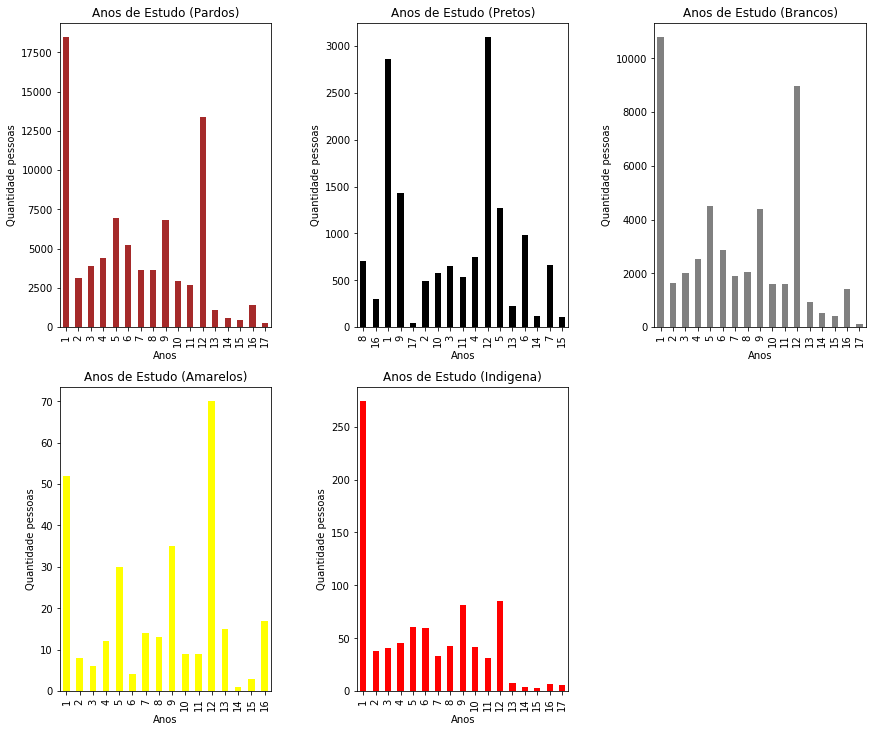

In [27]:
plt.subplot(231)
plot9 = AE1.plot(kind='bar',title='Anos de Estudo (Pardos)',figsize=(12, 10),color=('brown'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(232)
plot = AE2.plot(kind='bar',title='Anos de Estudo (Pretos)',figsize=(12, 10),color=('black'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(233)
plot = AE3.plot(kind='bar',title='Anos de Estudo (Brancos)',figsize=(12, 10),color=('grey'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(234)
plot = AE4.plot(kind='bar',title='Anos de Estudo (Amarelos)',figsize=(12, 10),color=('yellow'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(235)
plot = AE5.plot(kind='bar',title='Anos de Estudo (Indigena)',figsize=(12, 10),color=('r'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.tight_layout(pad=0.1, w_pad=3, h_pad=1.0)
plt.show()

### Entre um e cinco salários mínimos

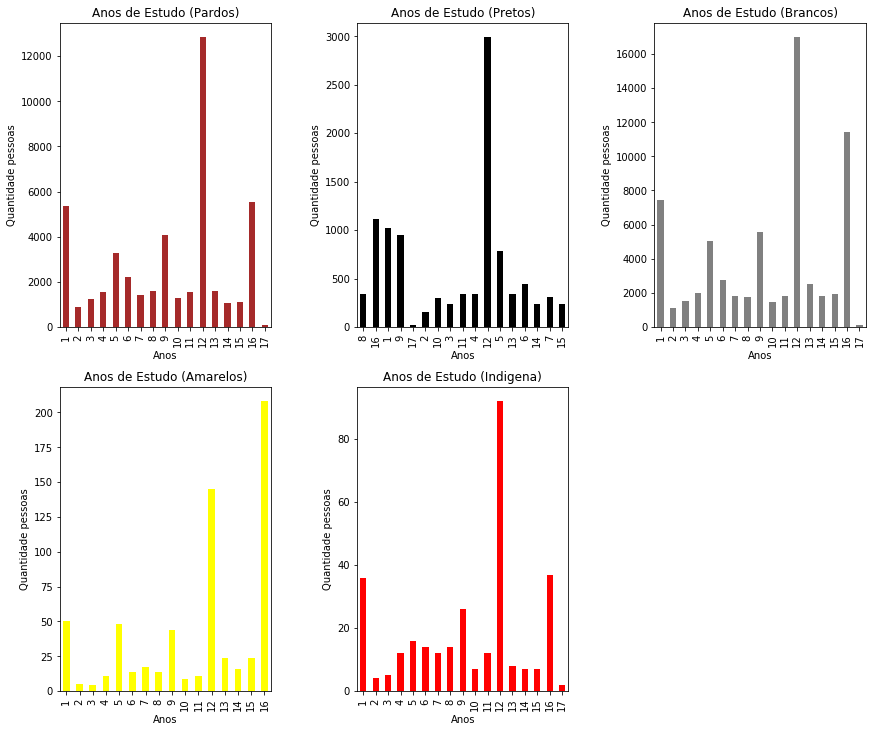

In [28]:
plt.subplot(231)
plot9 = AE12.plot(kind='bar',title='Anos de Estudo (Pardos)',figsize=(12, 10),color=('brown'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(232)
plot = AE22.plot(kind='bar',title='Anos de Estudo (Pretos)',figsize=(12, 10),color=('black'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(233)
plot = AE32.plot(kind='bar',title='Anos de Estudo (Brancos)',figsize=(12, 10),color=('grey'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(234)
plot = AE42.plot(kind='bar',title='Anos de Estudo (Amarelos)',figsize=(12, 10),color=('yellow'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(235)
plot = AE52.plot(kind='bar',title='Anos de Estudo (Indigena)',figsize=(12, 10),color=('r'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.tight_layout(pad=0.1, w_pad=3, h_pad=1.0)
plt.show()

### Mais que cinco salários mínimos

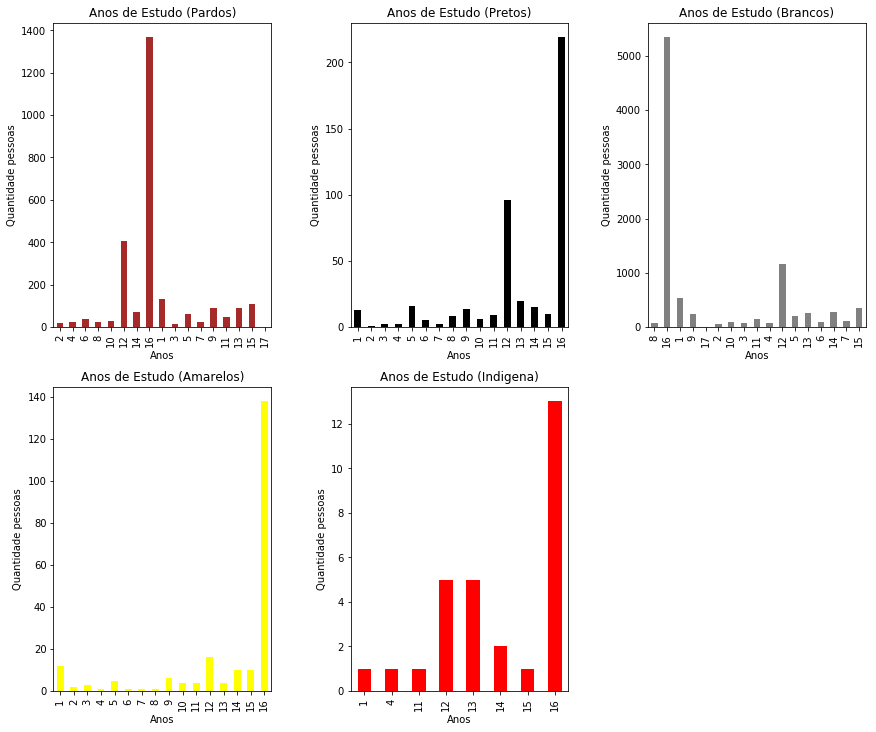

In [29]:
plt.subplot(231)
plot9 = AE13.plot(kind='bar',title='Anos de Estudo (Pardos)',figsize=(12, 10),color=('brown'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(232)
plot = AE23.plot(kind='bar',title='Anos de Estudo (Pretos)',figsize=(12, 10),color=('black'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(233)
plot = AE33.plot(kind='bar',title='Anos de Estudo (Brancos)',figsize=(12, 10),color=('grey'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(234)
plot = AE43.plot(kind='bar',title='Anos de Estudo (Amarelos)',figsize=(12, 10),color=('yellow'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.subplot(235)
plot = AE53.plot(kind='bar',title='Anos de Estudo (Indigena)',figsize=(12, 10),color=('r'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Anos')

plt.tight_layout(pad=0.1, w_pad=3, h_pad=1.0)
plt.show()

## Última série concluida

### Até um salário mínimo

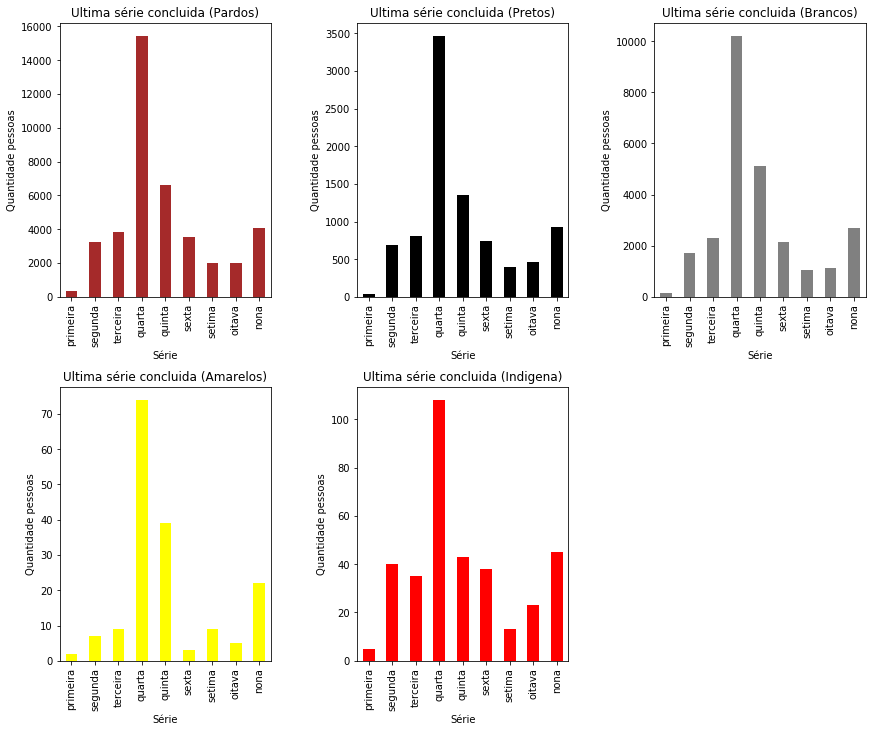

In [30]:
plt.subplot(231)
plot9 = USC1.plot(kind='bar',title='Ultima série concluida (Pardos)',figsize=(12, 10),color=('brown'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(232)
plot = USC2.plot(kind='bar',title='Ultima série concluida (Pretos)',figsize=(12, 10),color=('black'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(233)
plot = USC3.plot(kind='bar',title='Ultima série concluida (Brancos)',figsize=(12, 10),color=('grey'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(234)
plot = USC4.plot(kind='bar',title='Ultima série concluida (Amarelos)',figsize=(12, 10),color=('yellow'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(235)
plot = USC5.plot(kind='bar',title='Ultima série concluida (Indigena)',figsize=(12, 10),color=('r'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.tight_layout(pad=0.1, w_pad=3, h_pad=1.0)
plt.show()

### Entre um e cinco salários mínimos

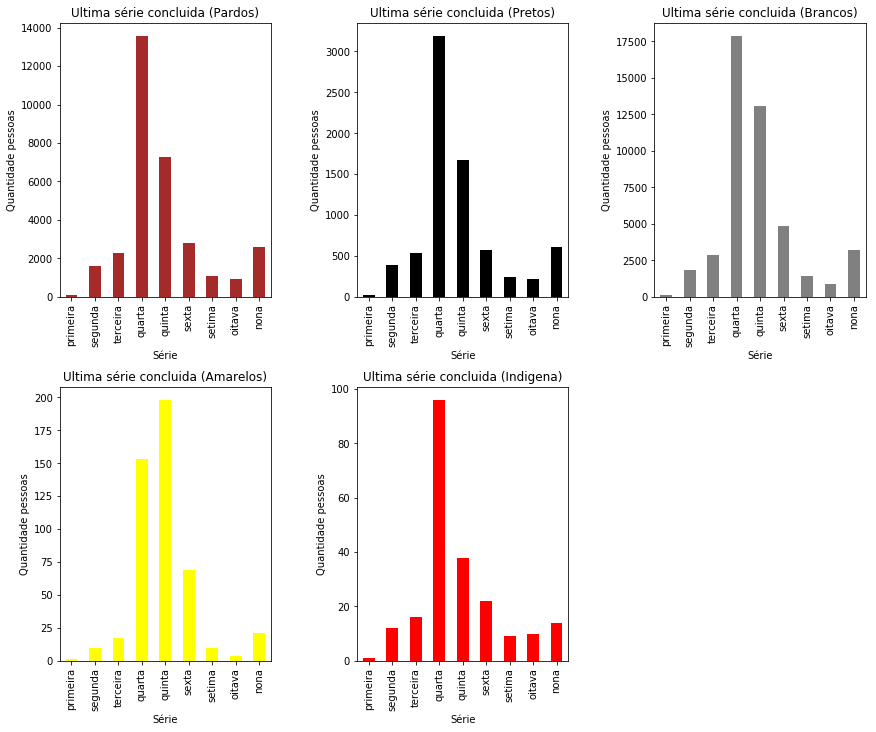

In [42]:
plt.subplot(231)
plot9 = USC12.plot(kind='bar',title='Ultima série concluida (Pardos)',figsize=(12, 10),color=('brown'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(232)
plot = USC22.plot(kind='bar',title='Ultima série concluida (Pretos)',figsize=(12, 10),color=('black'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(233)
plot = USC32.plot(kind='bar',title='Ultima série concluida (Brancos)',figsize=(12, 10),color=('grey'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(234)
plot = USC42.plot(kind='bar',title='Ultima série concluida (Amarelos)',figsize=(12, 10),color=('yellow'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(235)
plot = USC52.plot(kind='bar',title='Ultima série concluida (Indigena)',figsize=(12, 10),color=('r'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.tight_layout(pad=0.1, w_pad=3, h_pad=1.0)
plt.show()

### Mais que cinco salários mínimos

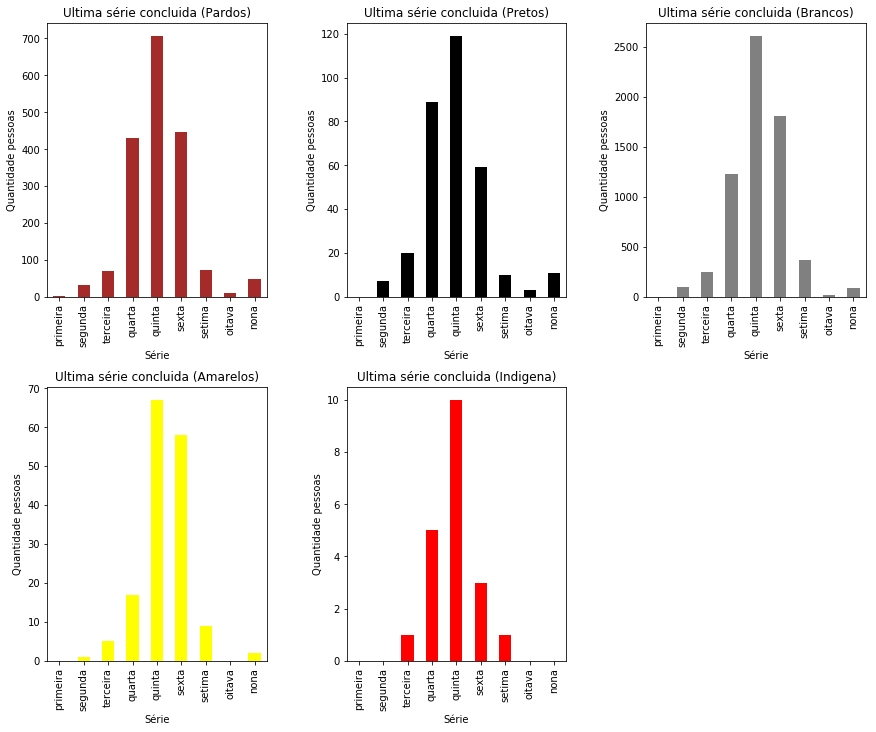

In [43]:
plt.subplot(231)
plot9 = USC13.plot(kind='bar',title='Ultima série concluida (Pardos)',figsize=(12, 10),color=('brown'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(232)
plot = USC23.plot(kind='bar',title='Ultima série concluida (Pretos)',figsize=(12, 10),color=('black'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(233)
plot = USC33.plot(kind='bar',title='Ultima série concluida (Brancos)',figsize=(12, 10),color=('grey'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(234)
plot = USC43.plot(kind='bar',title='Ultima série concluida (Amarelos)',figsize=(12, 10),color=('yellow'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.subplot(235)
plot = USC53.plot(kind='bar',title='Ultima série concluida (Indigena)',figsize=(12, 10),color=('r'))
plt.ylabel('Quantidade pessoas')
plt.xlabel('Série')

plt.tight_layout(pad=0.1, w_pad=3, h_pad=1.0)
plt.show()

#### Conclusão do tópico:

## Sabe ler e escrever

### Até um salário mínimo

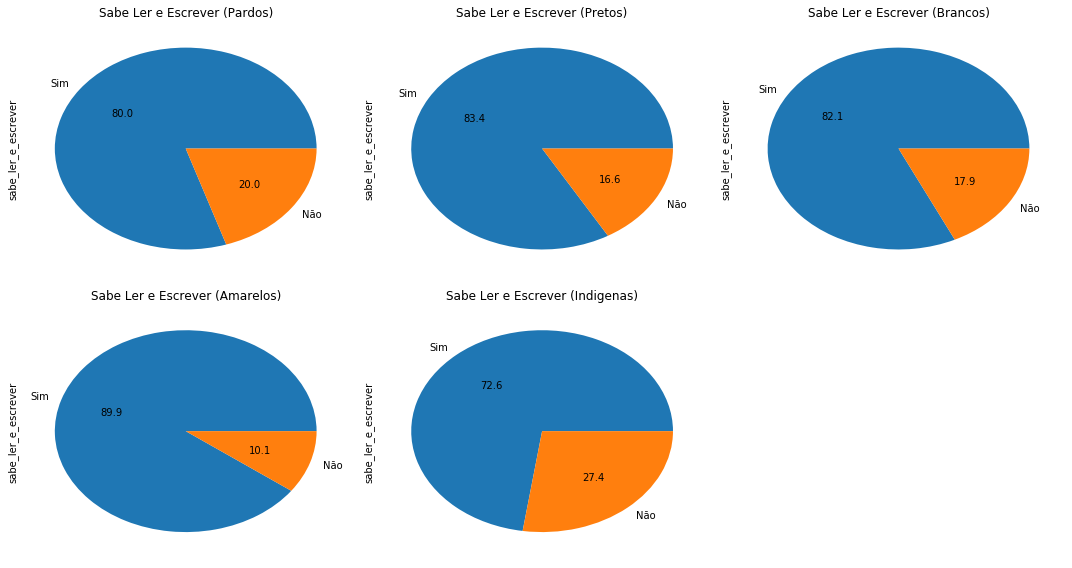

In [44]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(231)
plot = SLE1.plot(kind='pie',title='Sabe Ler e Escrever (Pardos)',autopct='%.1f')

plt.subplot(232)
plot = SLE2.plot(kind='pie',title='Sabe Ler e Escrever (Pretos)',autopct='%.1f')

plt.subplot(233)
plot = SLE3.plot(kind='pie',title='Sabe Ler e Escrever (Brancos)',autopct='%.1f')

plt.subplot(234)
plot = SLE4.plot(kind='pie',title='Sabe Ler e Escrever (Amarelos)',autopct='%.1f')

plt.subplot(235)
plot = SLE5.plot(kind='pie',title='Sabe Ler e Escrever (Indigenas)',autopct='%.1f')

plt.tight_layout()
plt.show()

### Entre um e cinco salários mínimos

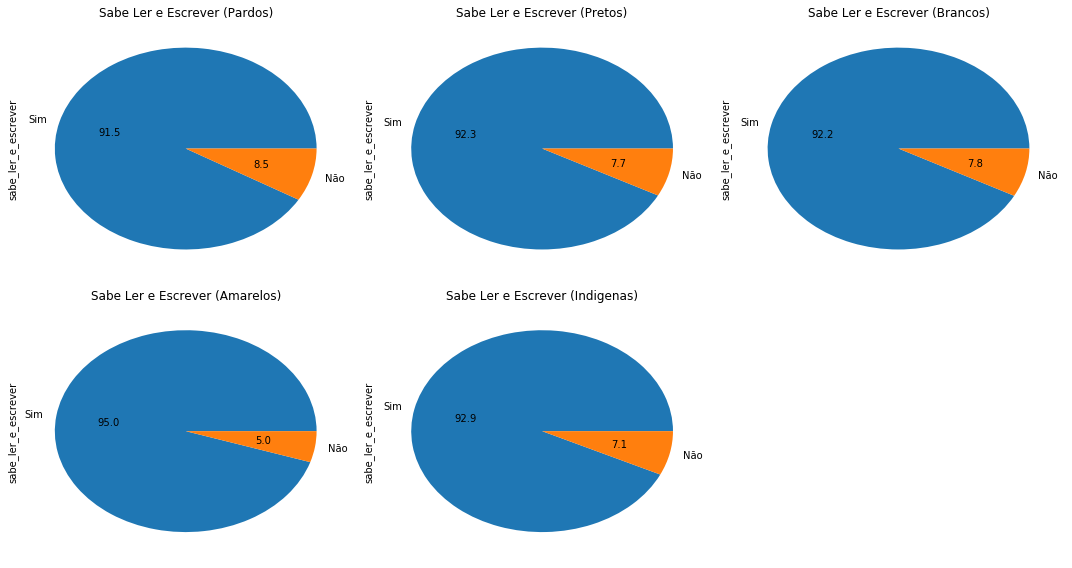

In [45]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(231)
plot = SLE12.plot(kind='pie',title='Sabe Ler e Escrever (Pardos)',autopct='%.1f')

plt.subplot(232)
plot = SLE22.plot(kind='pie',title='Sabe Ler e Escrever (Pretos)',autopct='%.1f')

plt.subplot(233)
plot = SLE32.plot(kind='pie',title='Sabe Ler e Escrever (Brancos)',autopct='%.1f')


plt.subplot(234)
plot = SLE42.plot(kind='pie',title='Sabe Ler e Escrever (Amarelos)',autopct='%.1f')

plt.subplot(235)
plot = SLE52.plot(kind='pie',title='Sabe Ler e Escrever (Indigenas)',autopct='%.1f')

plt.tight_layout()
plt.show()

### Mais que cinco salários mínimos

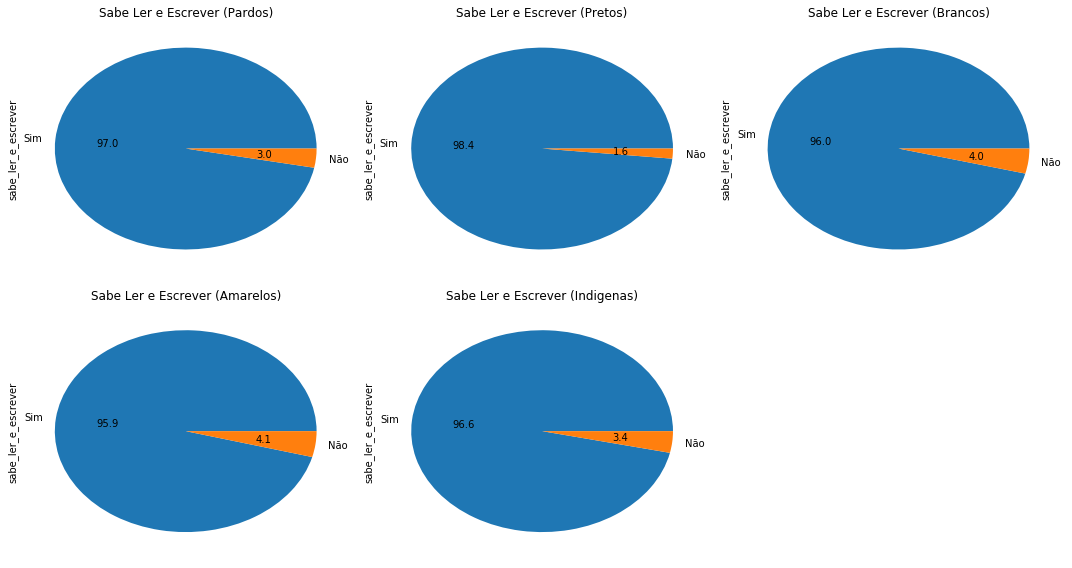

In [46]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(231)
plot = SLE13.plot(kind='pie',title='Sabe Ler e Escrever (Pardos)',autopct='%.1f')

plt.subplot(232)
plot = SLE23.plot(kind='pie',title='Sabe Ler e Escrever (Pretos)',autopct='%.1f')

plt.subplot(233)
plot = SLE33.plot(kind='pie',title='Sabe Ler e Escrever (Brancos)',autopct='%.1f')


plt.subplot(234)
plot = SLE43.plot(kind='pie',title='Sabe Ler e Escrever (Amarelos)',autopct='%.1f')

plt.subplot(235)
plot = SLE53.plot(kind='pie',title='Sabe Ler e Escrever (Indigenas)',autopct='%.1f')

plt.tight_layout()
plt.show()

#### Conclusão do tópico:

Com os gráficos obtidos é possível ver, que os amarelos são os que tem a melhor taxa, enquanto os pardos e os indigenas tem as piores. 

## Frequenta escola ou creche

### Até um salário mínimo

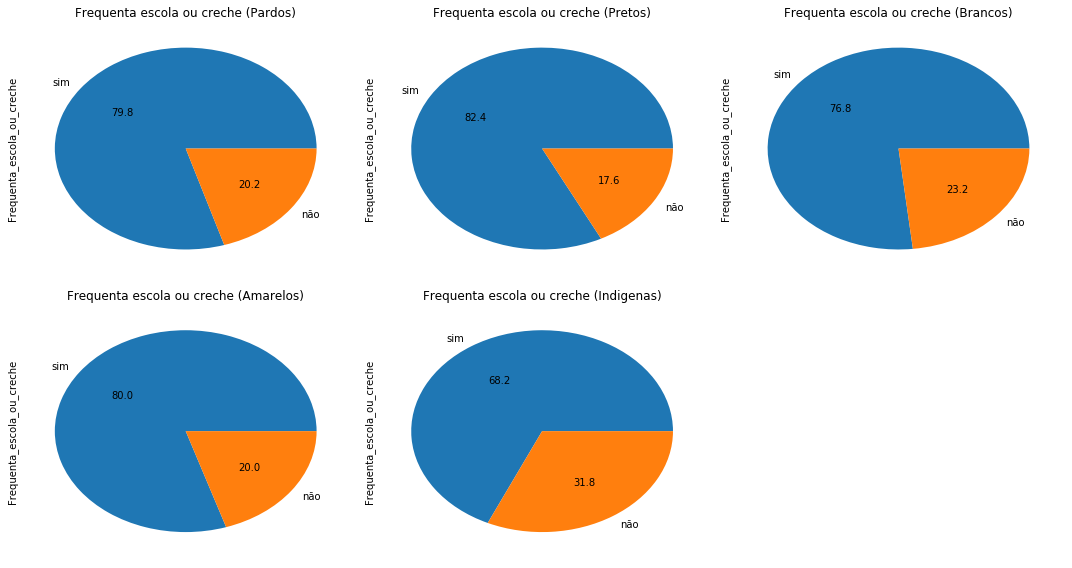

In [32]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(231)
plot = FE1.plot(kind='pie',title='Frequenta escola ou creche (Pardos)',autopct='%.1f')

plt.subplot(232)
plot = FE2.plot(kind='pie',title='Frequenta escola ou creche (Pretos)',autopct='%.1f')

plt.subplot(233)
plot = FE3.plot(kind='pie',title='Frequenta escola ou creche (Brancos)',autopct='%.1f')


plt.subplot(234)
plot = FE4.plot(kind='pie',title='Frequenta escola ou creche (Amarelos)',autopct='%.1f')

plt.subplot(235)
plot = FE5.plot(kind='pie',title='Frequenta escola ou creche (Indigenas)',autopct='%.1f')

plt.tight_layout()
plt.show()

### Entre um e cinco salários mínimos

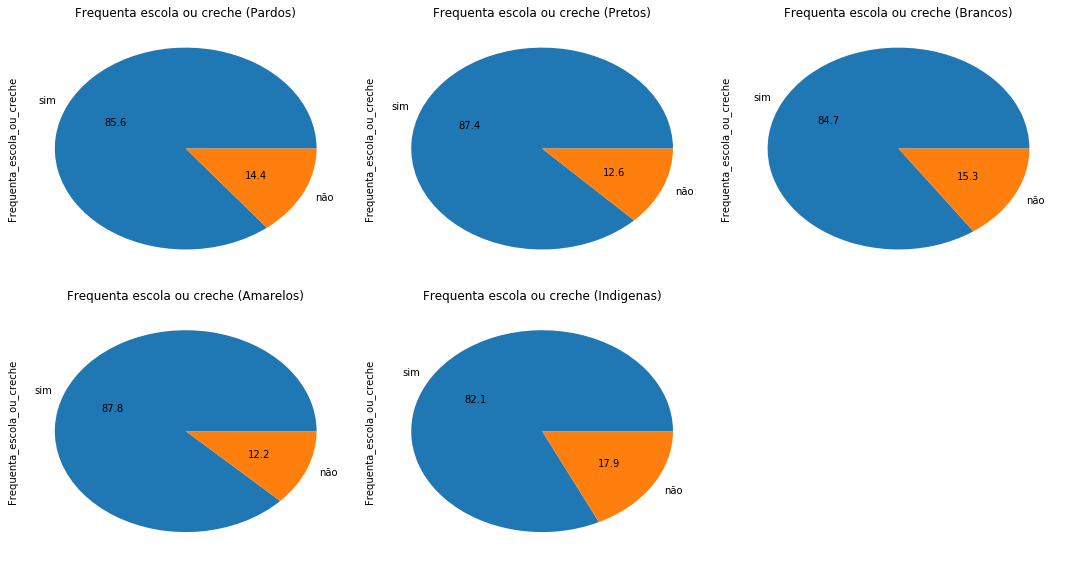

In [47]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(231)
plot = FE12.plot(kind='pie',title='Frequenta escola ou creche (Pardos)',autopct='%.1f')

plt.subplot(232)
plot = FE22.plot(kind='pie',title='Frequenta escola ou creche (Pretos)',autopct='%.1f')

plt.subplot(233)
plot = FE32.plot(kind='pie',title='Frequenta escola ou creche (Brancos)',autopct='%.1f')


plt.subplot(234)
plot = FE42.plot(kind='pie',title='Frequenta escola ou creche (Amarelos)',autopct='%.1f')

plt.subplot(235)
plot = FE52.plot(kind='pie',title='Frequenta escola ou creche (Indigenas)',autopct='%.1f')

plt.tight_layout()
plt.show()

### Mais que cinco salários mínimos

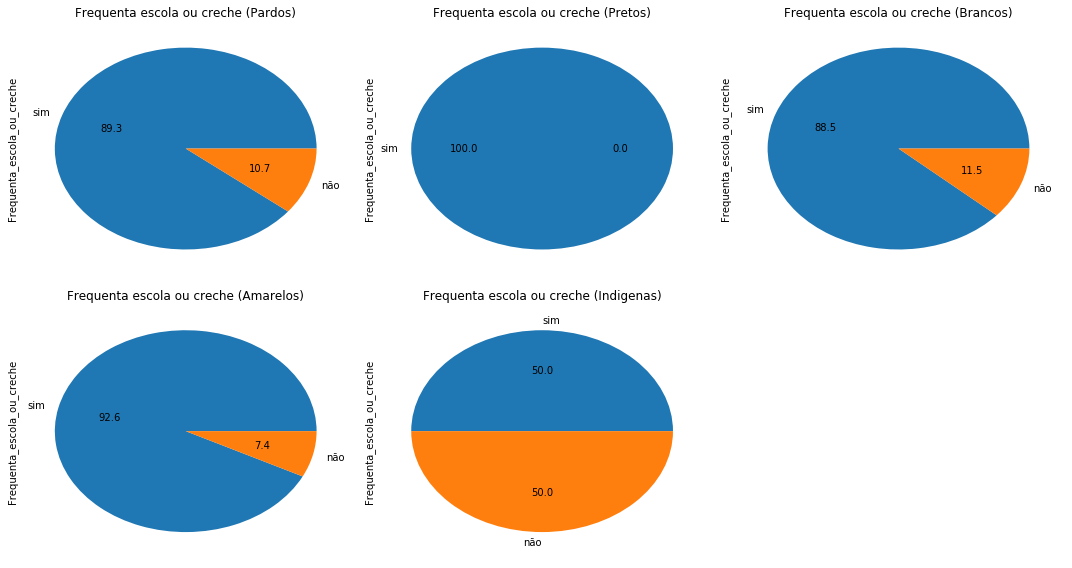

In [48]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(231)
plot = FE13.plot(kind='pie',title='Frequenta escola ou creche (Pardos)',autopct='%.1f')

plt.subplot(232)
plot = FE23.plot(kind='pie',title='Frequenta escola ou creche (Pretos)',autopct='%.1f')

plt.subplot(233)
plot = FE33.plot(kind='pie',title='Frequenta escola ou creche (Brancos)',autopct='%.1f')

plt.subplot(234)
plot = FE43.plot(kind='pie',title='Frequenta escola ou creche (Amarelos)',autopct='%.1f')

plt.subplot(235)
plot = FE53.plot(kind='pie',title='Frequenta escola ou creche (Indigenas)',autopct='%.1f')

plt.tight_layout()
plt.show()

#### Conclusão tópico:

Com os gráficos obtidos foi possível ver que os indígenas tem disparadamente as piores taxas, enquanto os pretos tem as melhores. 

## Rede de ensino

### Até um salário mínimo

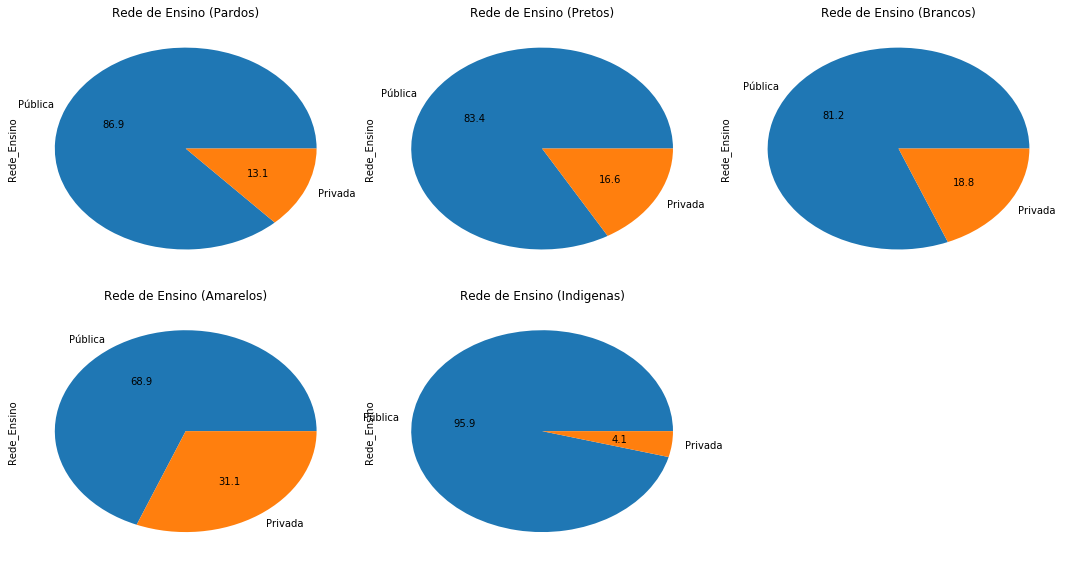

In [33]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(231)
plot = RE1.plot(kind='pie',title='Rede de Ensino (Pardos)',autopct='%.1f')

plt.subplot(232)
plot = RE2.plot(kind='pie',title='Rede de Ensino (Pretos)',autopct='%.1f')

plt.subplot(233)
plot = RE3.plot(kind='pie',title='Rede de Ensino (Brancos)',autopct='%.1f')


plt.subplot(234)
plot = RE4.plot(kind='pie',title='Rede de Ensino (Amarelos)',autopct='%.1f')

plt.subplot(235)
plot = RE5.plot(kind='pie',title='Rede de Ensino (Indigenas)',autopct='%.1f')

plt.tight_layout()
plt.show()

### entre um e cinco salários mínimos

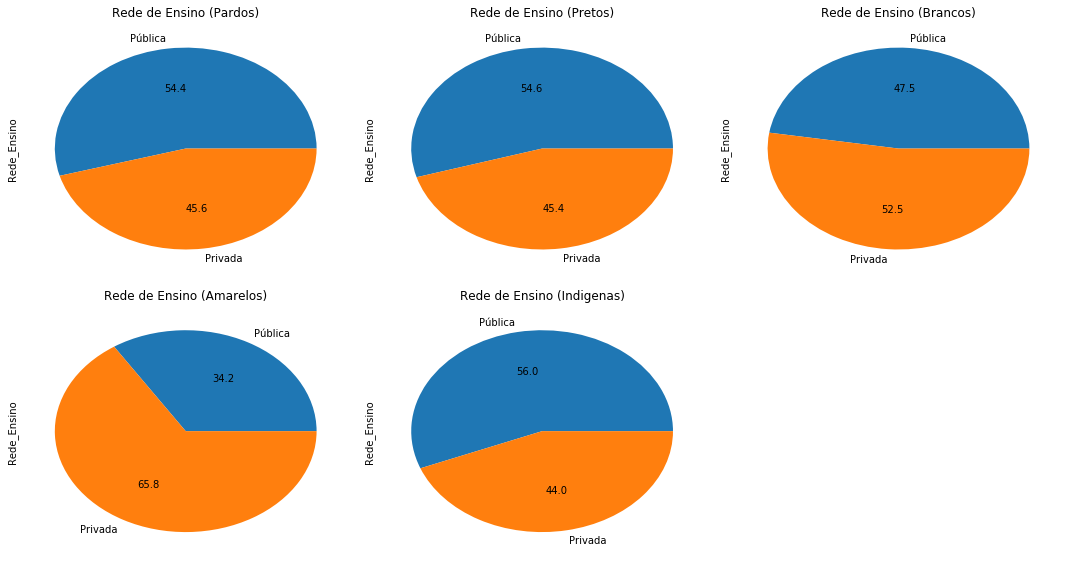

In [49]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(231)
plot = RE12.plot(kind='pie',title='Rede de Ensino (Pardos)',autopct='%.1f')

plt.subplot(232)
plot = RE22.plot(kind='pie',title='Rede de Ensino (Pretos)',autopct='%.1f')

plt.subplot(233)
plot = RE32.plot(kind='pie',title='Rede de Ensino (Brancos)',autopct='%.1f')


plt.subplot(234)
plot = RE42.plot(kind='pie',title='Rede de Ensino (Amarelos)',autopct='%.1f')

plt.subplot(235)
plot = RE52.plot(kind='pie',title='Rede de Ensino (Indigenas)',autopct='%.1f')

plt.tight_layout()
plt.show()

### Mais que cinco salários mínimos

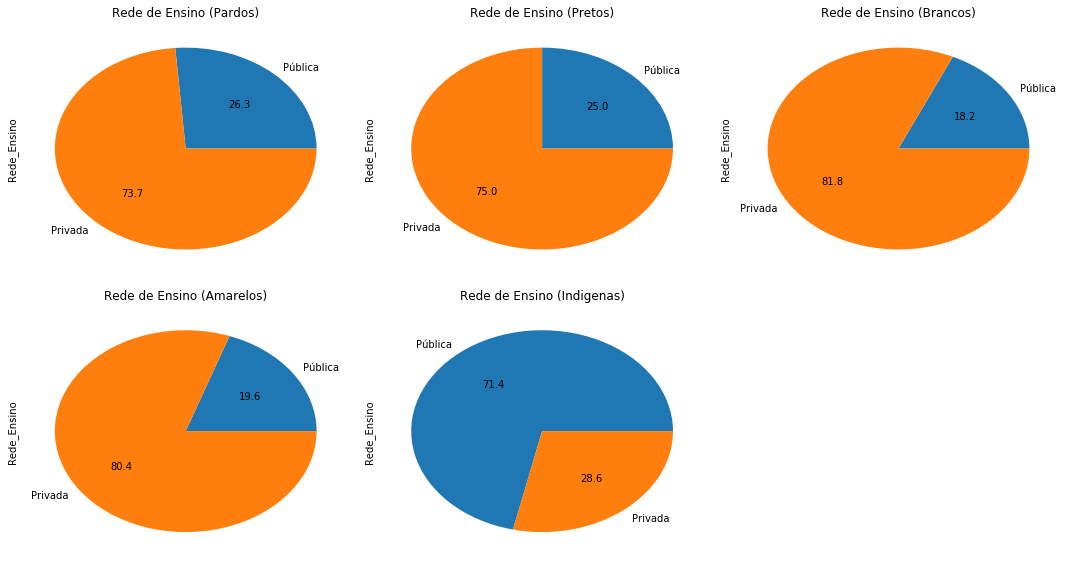

In [50]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(231)
plot = RE13.plot(kind='pie',title='Rede de Ensino (Pardos)',autopct='%.1f')

plt.subplot(232)
plot = RE23.plot(kind='pie',title='Rede de Ensino (Pretos)',autopct='%.1f')

plt.subplot(233)
plot = RE33.plot(kind='pie',title='Rede de Ensino (Brancos)',autopct='%.1f')


plt.subplot(234)
plot = RE43.plot(kind='pie',title='Rede de Ensino (Amarelos)',autopct='%.1f')

plt.subplot(235)
plot = RE53.plot(kind='pie',title='Rede de Ensino (Indigenas)',autopct='%.1f')

plt.tight_layout()
plt.show()

___
## Conclusão 

Com todos os gráficos obtidos, foi possível ver primeiramente, a grande melhora na escolaridade conforme a renda per capita aumenta. Outra conclusão a ser tomada, é que os amarelos são os com as melhores taxas de escolaridade, enquanto os indigenas tem as piores.

As taxas baixas dos indigenas pode nos mostrar que mesmo no sec.XXI, os mesmos ainda não estão totalmente incluidos na sociedade. Ja as taxas altas de amarelos, pode ser interpretada pela diferença cultural existente.

Muitas pesquisas mostram a diferença na escolaridade entre pardos, brancos e pretos. Neste trabalho foi possivel ver o contrário, ja que as taxas de escolaridade entre os pardos, negros e brancos estavam equilibradas. Uma explicação para o resultado alterado da pesquisa, é que ela foi filtrada por classe social, diferentemente das outras, que por ter mais pardos e pretos com menos renda, apresentavam eles com menos escolaridade também.